In [1]:
!nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2021 NVIDIA Corporation
Built on Sun_Feb_14_21:12:58_PST_2021
Cuda compilation tools, release 11.2, V11.2.152
Build cuda_11.2.r11.2/compiler.29618528_0


In [2]:
!nvidia-smi

Fri Dec 16 18:09:58 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   43C    P0    27W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

# Preparations

In [3]:
from google.colab import drive
drive.mount('/content/drive')
%cd '/content/drive/MyDrive/Colab Notebooks/AppliedGPU_hw3/ex_2'
!ls

Mounted at /content/drive
/content/drive/MyDrive/Colab Notebooks/AppliedGPU_hw3/ex_2
lab3_ex2  lab3_ex2.cu


### Compiling

In [4]:
!nvcc -arch=sm_75 ./lab3_ex2.cu -o lab3_ex2

!nvcc -arch=sm_75 ./lab3_ex1.cu -o lab3_ex1

### Execution

In [5]:
!./lab3_ex2 511 1023 4094

Dimensions of input matrix A (511 x 1023), B (1023 x 4094), and output matrix C (511 x 4094)
CPU & GPU results are equal.


# Profiling

In [6]:
!/usr/local/cuda-11/bin/nv-nsight-cu-cli ./lab3_ex2 511 1023 4094

Dimensions of input matrix A (511 x 1023), B (1023 x 4094), and output matrix C (511 x 4094)
==PROF== Connected to process 343 (/content/drive/MyDrive/Colab Notebooks/AppliedGPU_hw3/ex_2/lab3_ex2)
==PROF== Profiling "gemm" - 1: 0%....50%....100% - 8 passes
CPU & GPU results are equal.
==PROF== Disconnected from process 343
[343] lab3_ex2@127.0.0.1
  gemm(float*, float*, float*, int, int, int, int), 2022-Dec-16 18:11:16, Context 1, Stream 7
    Section: GPU Speed Of Light
    ---------------------------------------------------------------------- --------------- ------------------------------
    DRAM Frequency                                                           cycle/nsecond                           5.00
    SM Frequency                                                             cycle/usecond                         585.15
    Elapsed Cycles                                                                   cycle                      8,757,900
    Memory [%]                      

In [7]:
!nvprof ./lab3_ex2 3000 4096 3000

Dimensions of input matrix A (3000 x 4096), B (4096 x 3000), and output matrix C (3000 x 3000)
==355== NVPROF is profiling process 355, command: ./lab3_ex2 3000 4096 3000
CPU & GPU results are NOT equal.
==355== Profiling application: ./lab3_ex2 3000 4096 3000
==355== Profiling result:
            Type  Time(%)      Time     Calls       Avg       Min       Max  Name
 GPU activities:   84.81%  277.07ms         1  277.07ms  277.07ms  277.07ms  gemm(float*, float*, float*, int, int, int, int)
                    8.22%  26.861ms         1  26.861ms  26.861ms  26.861ms  [CUDA memcpy DtoH]
                    6.97%  22.778ms         2  11.389ms  10.053ms  12.725ms  [CUDA memcpy HtoD]
      API calls:   49.86%  329.33ms         3  109.78ms  116.54us  329.07ms  cudaMalloc
                   49.68%  328.12ms         3  109.37ms  10.271ms  304.87ms  cudaMemcpy
                    0.37%  2.4516ms         3  817.20us  247.15us  1.1174ms  cudaFree
                    0.06%  363.35us         1  363.

# Plotting

In [8]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import numpy as np

### Double as datatype

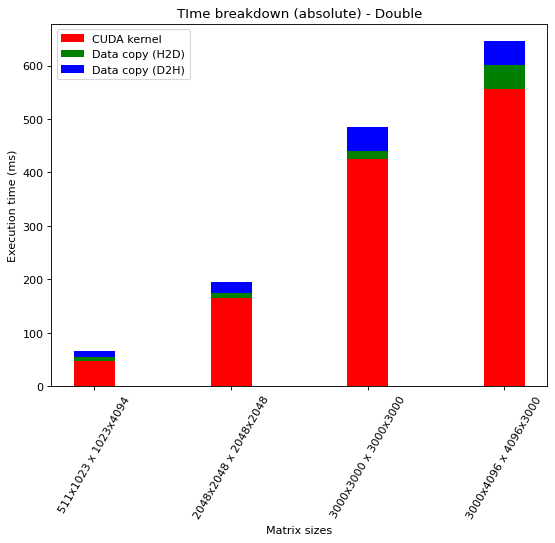

In [11]:
# absolute time
matrix_sizes = ['511x1023 x 1023x4094', '2048x2048 x 2048x2048', '3000x3000 x 3000x3000', '3000x4096 x 4096x3000']

figure(figsize=(8, 6), dpi=80)

time_cuda_kernel_abs = np.array([47.472, 164.90, 424.99, 555.27])
time_datacopy_d2h_abs = np.array([9.7742, 21.989, 44.591, 45.382])
time_datacopy_h2d_abs = np.array([7.8252, 8.7265, 14.764, 45.218])


plt.bar(matrix_sizes, time_cuda_kernel_abs, label='CUDA kernel', color = 'red', width = 0.3)
plt.bar(matrix_sizes, time_datacopy_h2d_abs, bottom=time_cuda_kernel_abs,
       label='Data copy (H2D)', color = 'green', width = 0.3)
plt.bar(matrix_sizes, time_datacopy_d2h_abs, bottom=time_datacopy_h2d_abs+time_cuda_kernel_abs,
       label='Data copy (D2H)', color = 'blue', width = 0.3)

plt.title('TIme breakdown (absolute) - Double')
plt.xlabel('Matrix sizes')
plt.xticks(rotation=60)
plt.ylabel('Execution time (ms)')
plt.legend()

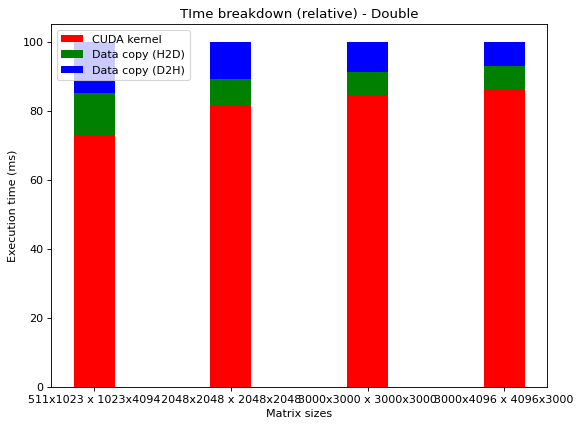

In [12]:
# relative time
matrix_sizes = ['511x1023 x 1023x4094', '2048x2048 x 2048x2048', '3000x3000 x 3000x3000', '3000x4096 x 4096x3000']

figure(figsize=(8, 6), dpi=80)

time_cuda_kernel_rel = np.array([72.95, 81.42, 84.49, 85.97])
time_datacopy_d2h_rel = np.array([15.02, 10.86, 8.87, 7.03])
time_datacopy_h2d_rel = np.array([12.03, 7.72, 6.64, 7.00])


plt.bar(matrix_sizes, time_cuda_kernel_rel, label='CUDA kernel', color = 'red', width = 0.3)
plt.bar(matrix_sizes, time_datacopy_h2d_rel, bottom=time_cuda_kernel_rel,
       label='Data copy (H2D)', color = 'green', width = 0.3)
plt.bar(matrix_sizes, time_datacopy_d2h_rel, bottom=time_datacopy_h2d_rel+time_cuda_kernel_rel,
       label='Data copy (D2H)', color = 'blue', width = 0.3)

plt.title('TIme breakdown (relative) - Double')
plt.xlabel('Matrix sizes')
plt.ylabel('Execution time (ms)')
plt.legend()

### Float as datatype

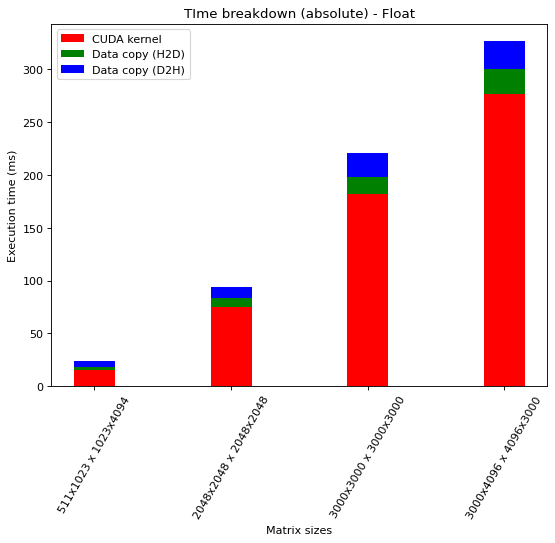

In [13]:
# absolute time
matrix_sizes = ['511x1023 x 1023x4094', '2048x2048 x 2048x2048', '3000x3000 x 3000x3000', '3000x4096 x 4096x3000']

figure(figsize=(8, 6), dpi=80)

time_cuda_kernel_abs = np.array([14.971, 75.091, 181.54, 277.07])
time_datacopy_d2h_abs = np.array([4.8084, 9.9103, 23.441, 26.861])
time_datacopy_h2d_abs = np.array([3.6621, 8.7453, 16.037, 22.778])


plt.bar(matrix_sizes, time_cuda_kernel_abs, label='CUDA kernel', color = 'red', width = 0.3)
plt.bar(matrix_sizes, time_datacopy_h2d_abs, bottom=time_cuda_kernel_abs,
       label='Data copy (H2D)', color = 'green', width = 0.3)
plt.bar(matrix_sizes, time_datacopy_d2h_abs, bottom=time_datacopy_h2d_abs+time_cuda_kernel_abs,
       label='Data copy (D2H)', color = 'blue', width = 0.3)

plt.title('TIme breakdown (absolute) - Float')
plt.xlabel('Matrix sizes')
plt.xticks(rotation=60)
plt.ylabel('Execution time (ms)')
plt.legend()

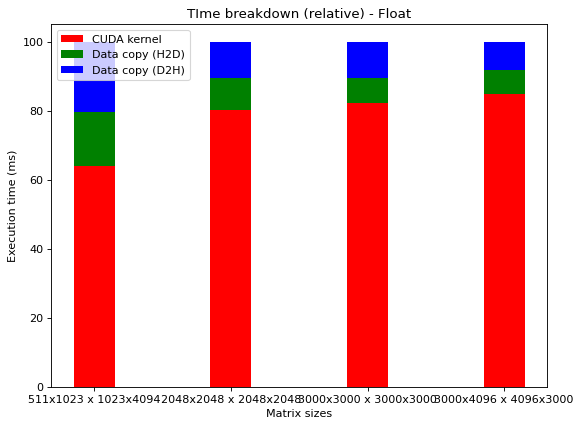

In [15]:
# relative time
matrix_sizes = ['511x1023 x 1023x4094', '2048x2048 x 2048x2048', '3000x3000 x 3000x3000', '3000x4096 x 4096x3000']

figure(figsize=(8, 6), dpi=80)

time_cuda_kernel_rel = np.array([63.87, 80.10, 82.14, 84.81])
time_datacopy_d2h_rel = np.array([20.51, 10.57, 10.61, 8.22])
time_datacopy_h2d_rel = np.array([15.62, 9.33, 7.26, 6.97])


plt.bar(matrix_sizes, time_cuda_kernel_rel, label='CUDA kernel', color = 'red', width = 0.3)
plt.bar(matrix_sizes, time_datacopy_h2d_rel, bottom=time_cuda_kernel_rel,
       label='Data copy (H2D)', color = 'green', width = 0.3)
plt.bar(matrix_sizes, time_datacopy_d2h_rel, bottom=time_datacopy_h2d_rel+time_cuda_kernel_rel,
       label='Data copy (D2H)', color = 'blue', width = 0.3)

plt.title('TIme breakdown (relative) - Float')
plt.xlabel('Matrix sizes')
plt.ylabel('Execution time (ms)')
plt.legend()